# 타이타닉 데이터 
  
|변수|설명|
|------|---|
|survival|Survival (0 = No; 1 = Yes)|
|pclass|Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)|
|name|Name|
|sex|Sex|
|age|Age|
|sibsp|Number of Siblings/Spouses Aboard|
|parch|Number of Parents/Children Aboard|
|ticket|Ticket Number|
|fare|Passenger Fare|
|cabin|Cabin|
|embarked|Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)|


pclass = 1,2,3등석  
sibsp = 자매 수  
parch = 부모/아이 수  
fare = 객실 요금  
cabin = 객실 번호  
embarked = 승선지  

In [27]:
# 패키지 출력
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 타이타닉 데이터 불러오기

In [28]:
train = pd.read_csv('C:/Users/Edward/Desktop/PythonWorkspace/Titanic/train.csv')

# 확인
train.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C

In [29]:
train.shape

(891, 12)

In [30]:
test = pd.read_csv('C:/Users/Edward/Desktop/PythonWorkspace/Titanic/test.csv')

# 확인
test.head(2)

PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   

   Parch  Ticket    Fare Cabin Embarked  
0      0  330911  7.8292   NaN        Q  
1      0  363272  7.0000   NaN        S

In [31]:
test.shape

(418, 11)

In [32]:
type(train)

type(test)

pandas.core.frame.DataFrame

## x와 y 분리

In [33]:
target = 'Survived'
X = train.drop(target, axis=1)
Y = train[target]

## train, val, test 셋 분할

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
# test_size 속성값으로 소수점을 주면 비율로, 정수로 주면 개수로 분할해준다.
# random_state 속성값은 난수 설정값이다.
x, x_test, y, y_test = train_test_split(X, Y, test_size=.1, random_state=2022)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=80, random_state=2022)

## 결측치 확인

In [36]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 결측치 시각화

In [37]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(x_train)
plt.show()

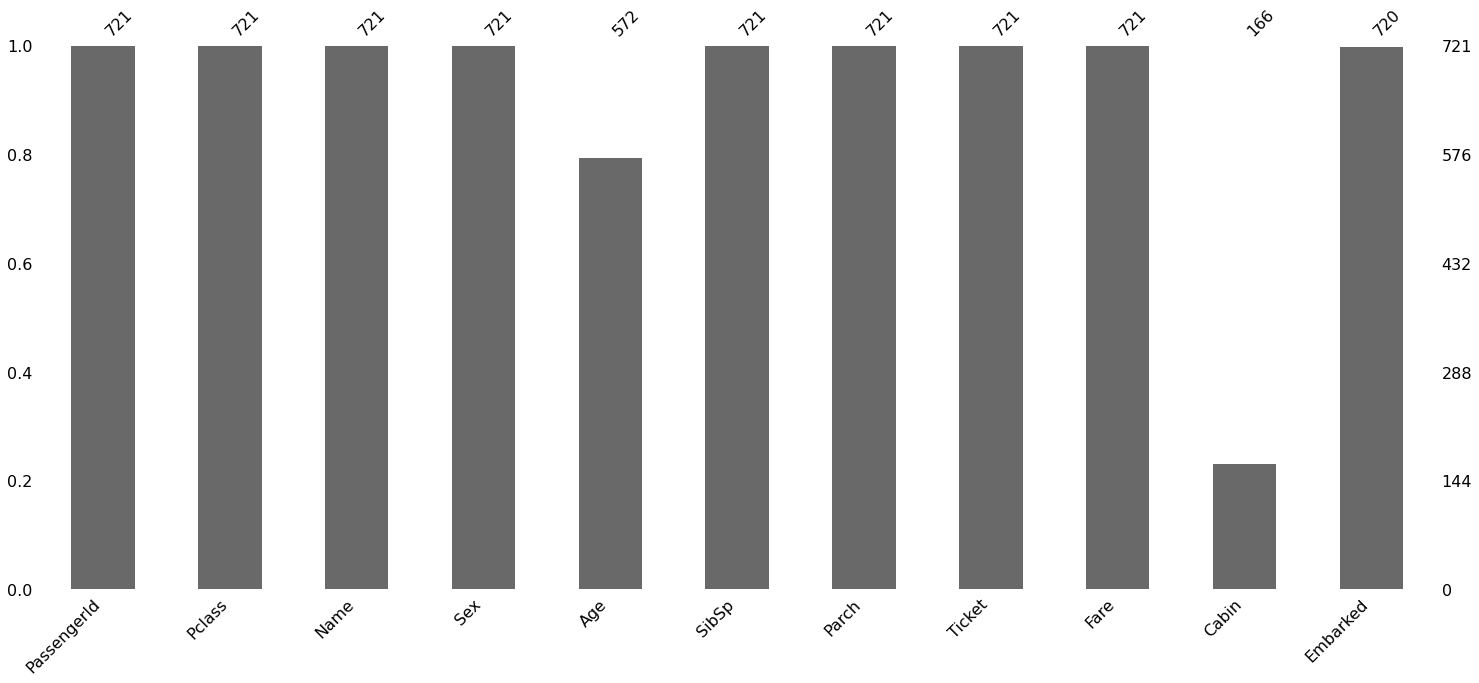

In [38]:
msno.bar(x_train)
plt.show()

In [39]:
from sklearn.impute import SimpleImputer
# 대상을 리스트로 선언
imputer1_list = ['Embarked']

# 선언하고 fit_transform
imputer1 = SimpleImputer(strategy = 'most_frequent') # 최빈값을 이용한 결측치를 채우는 함수 사용
x_train[imputer1_list] = imputer1.fit_transform(x_train[imputer1_list])
x_train.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            149
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          555
Embarked         0
dtype: int64

In [40]:
x_train[x_train['Cabin'].isna()]

PassengerId  Pclass                               Name     Sex   Age  \
60            61       3              Sirayanian, Mr. Orsen    male  22.0   
324          325       3           Sage, Mr. George John Jr    male   NaN   
706          707       2      Kelly, Mrs. Florence "Fannie"  female  45.0   
290          291       1       Barber, Miss. Ellen "Nellie"  female  26.0   
542          543       3  Andersson, Miss. Sigrid Elisabeth  female  11.0   
..           ...     ...                                ...     ...   ...   
243          244       3      Maenpaa, Mr. Matti Alexanteri    male  22.0   
728          729       2    Bryhl, Mr. Kurt Arnold Gottfrid    male  25.0   
528          529       3          Salonen, Mr. Johan Werner    male  39.0   
693          694       3                   Saad, Mr. Khalil    male  25.0   
354          355       3                  Yousif, Mr. Wazli    male   NaN   

     SibSp  Parch             Ticket     Fare Cabin Embarked  
60       0      0               2669   7.2292   NaN        C  
324      8      2           CA. 2343  69.5500   NaN        S  
706      0      0             223596  13.5000   NaN        S  
290      0      0              19877  78.8500   NaN        S  
542      4      2             347082  31.2750   NaN        S  
..     ...    ...                ...      ...   ...      ...  
243      0      0  STON/O 2. 3101275   7.1250   NaN        S  
728      1      0             236853  26.0000   NaN        S  
528      0      0            3101296   7.9250   NaN        S  
693      0      0               2672   7.2250   NaN        C  
354      0      0               2647   7.2250   NaN        C  

[555 rows x 11 columns]

In [41]:
from sklearn.impute import SimpleImputer
# 대상을 리스트로 선언
imputer2_list = ['Cabin']

# 선언하고 fit_transform
imputer2 = SimpleImputer(strategy = 'constant', fill_value='Standee')
x_train[imputer2_list] = imputer2.fit_transform(x_train[imputer2_list])
x_train.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            149
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [42]:
from sklearn.impute import KNNImputer

In [43]:
cat = {'Sex':['female', 'male'],
       'Embarked':['S', 'Q', 'C'],
       'Pclass':[1, 2, 3]}
       
x_train = pd.get_dummies(x_train, columns=cat.keys(), drop_first=True)

In [44]:
x_train.tail(2)

PassengerId               Name   Age  SibSp  Parch Ticket   Fare  \
693          694   Saad, Mr. Khalil  25.0      0      0   2672  7.225   
354          355  Yousif, Mr. Wazli   NaN      0      0   2647  7.225   

       Cabin  Sex_male  Embarked_Q  Embarked_S  Pclass_2  Pclass_3  
693  Standee         1           0           0         0         1  
354  Standee         1           0           0         0         1

In [45]:
# n_neighbors=5(디폴트 값)
imputer3 = KNNImputer(n_neighbors=3)

In [46]:
cols = x_train.columns
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 721 entries, 60 to 354
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  721 non-null    int64  
 1   Name         721 non-null    object 
 2   Age          572 non-null    float64
 3   SibSp        721 non-null    int64  
 4   Parch        721 non-null    int64  
 5   Ticket       721 non-null    object 
 6   Fare         721 non-null    float64
 7   Cabin        721 non-null    object 
 8   Sex_male     721 non-null    uint8  
 9   Embarked_Q   721 non-null    uint8  
 10  Embarked_S   721 non-null    uint8  
 11  Pclass_2     721 non-null    uint8  
 12  Pclass_3     721 non-null    uint8  
dtypes: float64(2), int64(3), object(3), uint8(5)
memory usage: 54.2+ KB


In [53]:
x_train = imputer3.fit_transform(x_train)

ValueError: could not convert string to float: 'Sirayanian, Mr. Orsen'

In [ ]:
x_val = imputer3.transform(x_val)

In [54]:
# 변환 전 데이터 확인
x_train.head(10)

PassengerId                                               Name   Age  \
60            61                              Sirayanian, Mr. Orsen  22.0   
123          124                                Webber, Miss. Susan  32.5   
324          325                           Sage, Mr. George John Jr   NaN   
706          707                      Kelly, Mrs. Florence "Fannie"  45.0   
290          291                       Barber, Miss. Ellen "Nellie"  26.0   
781          782          Dick, Mrs. Albert Adrian (Vera Gillespie)  17.0   
542          543                  Andersson, Miss. Sigrid Elisabeth  11.0   
610          611  Andersson, Mrs. Anders Johan (Alfrida Konstant...  39.0   
388          389                               Sadlier, Mr. Matthew   NaN   
351          352             Williams-Lambert, Mr. Fletcher Fellows   NaN   

     SibSp  Parch    Ticket     Fare    Cabin  Sex_male  Embarked_Q  \
60       0      0      2669   7.2292  Standee         1           0   
123      0      0     27267  13.0000     E101         0           0   
324      8      2  CA. 2343  69.5500  Standee         1           0   
706      0      0    223596  13.5000  Standee         0           0   
290      0      0     19877  78.8500  Standee         0           0   
781      1      0     17474  57.0000      B20         0           0   
542      4      2    347082  31.2750  Standee         0           0   
610      1      5    347082  31.2750  Standee         0           0   
388      0      0    367655   7.7292  Standee         1           1   
351      0      0    113510  35.0000     C128         1           0   

     Embarked_S  Pclass_2  Pclass_3  
60            0         0         1  
123           1         1         0  
324           1         0         1  
706           1         1         0  
290           1         0         0  
781           1         0         0  
542           1         0         1  
610           1         0         1  
388           0         0         1  
351           1         0         0

In [58]:
#변환
from impyute.imputation.cs import fast_knn
np_imputed = fast_knn(train.values, k=3)# KNN 학습 
train = pd.DataFrame(np_imputed)

# 변환 후 데이터 확인
train.head(10)

BadInputError: Data is not float.